In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bless\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
ratings_df = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\WEEK1\data\raw_analyst_ratings.csv')

In [3]:
print(ratings_df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [4]:
ratings_df['date'] = pd.to_datetime(ratings_df['date'], errors='coerce')

In [5]:
ratings_df = ratings_df.dropna(subset=['date'])

In [6]:
ratings_df['headline_length'] = ratings_df['headline'].astype(str).str.len()

In [7]:
print(ratings_df['headline_length'].describe())

count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


In [8]:
publisher_counts = ratings_df['publisher'].value_counts()
print(publisher_counts.head(10))

publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


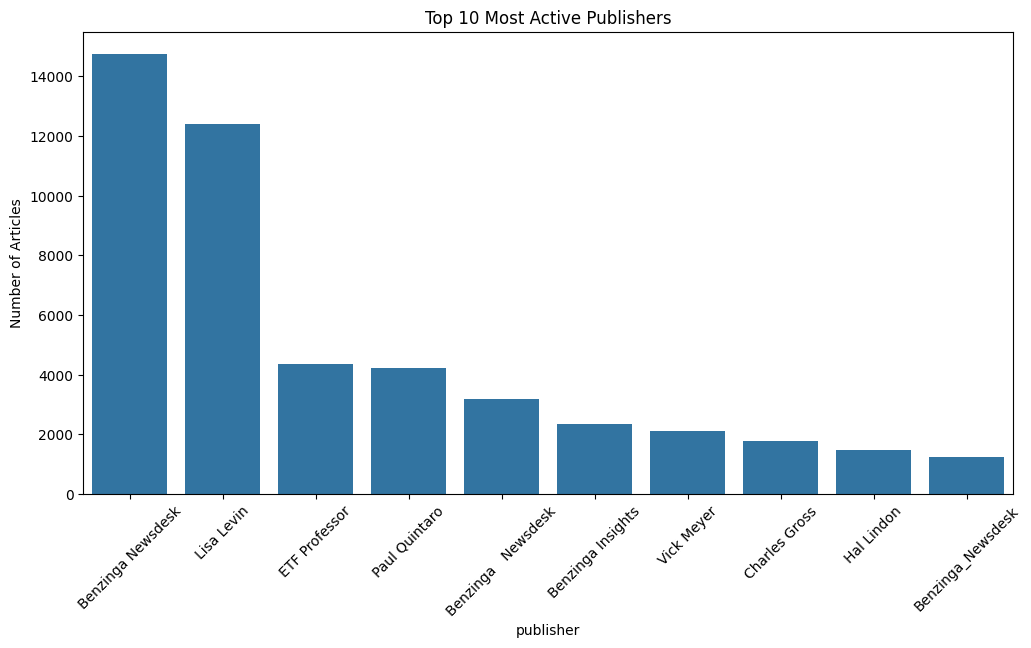

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.index[:10], y=publisher_counts.values[:10])
plt.title("Top 10 Most Active Publishers")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

In [10]:
date_counts = ratings_df['date'].value_counts().sort_index()
print(date_counts.tail(10))

date
2020-06-11 15:32:46-04:00    1
2020-06-11 16:15:38-04:00    1
2020-06-11 16:24:41-04:00    1
2020-06-11 16:25:21-04:00    1
2020-06-11 16:30:31-04:00    1
2020-06-11 16:49:41-04:00    1
2020-06-11 16:51:33-04:00    1
2020-06-11 17:01:39-04:00    1
2020-06-11 17:11:20-04:00    1
2020-06-11 17:12:35-04:00    1
Name: count, dtype: int64


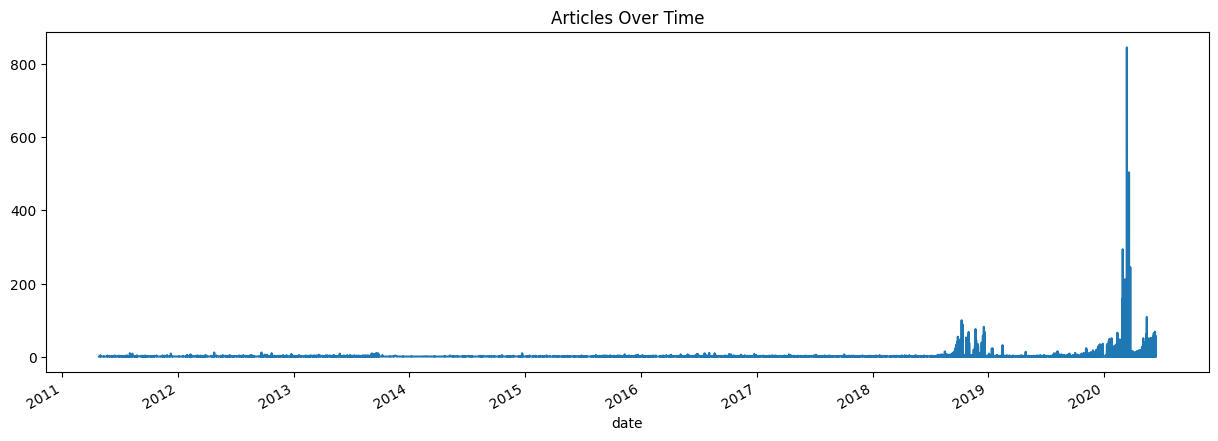

In [11]:
date_counts.plot(kind='line', figsize=(15,5), title="Articles Over Time")
plt.show()

In [12]:
ratings_df['day_of_week'] = ratings_df['date'].dt.day_name()
print(ratings_df['day_of_week'].value_counts())

day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


In [13]:
ratings_df.to_csv(r"C:\Users\bless\OneDrive\Desktop\WEEK1\data\cleaned_data_set\cleaned_analyst_ratings.csv", index=False)


In [14]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)      
    return text

In [15]:
ratings_df['clean_headline'] = ratings_df['headline'].apply(clean_text)

In [16]:
tfidf = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
X = tfidf.fit_transform(ratings_df['clean_headline'])

In [17]:
feature_names = tfidf.get_feature_names_out()
top_keywords = sorted(zip(tfidf.idf_, feature_names))[:30]
print("Top Keywords:\n", top_keywords)

Top Keywords:
 [(np.float64(2.4763174065267464), 'stocks'), (np.float64(2.832925346545724), 'week'), (np.float64(2.9251581891610154), 'shares'), (np.float64(3.1473531334792604), 'trading'), (np.float64(3.2503545370374614), 'hit'), (np.float64(3.327871759258779), 'eps'), (np.float64(3.40931986266026), 'price'), (np.float64(3.4835501365324735), 'target'), (np.float64(3.487625209195888), 'companies'), (np.float64(3.557263033946086), 'sales'), (np.float64(3.5850653152580376), 'higher'), (np.float64(3.639093052193718), 'market'), (np.float64(3.7055171542065013), 'lows'), (np.float64(3.807261672563472), 'session'), (np.float64(3.841877619330005), 'maintains'), (np.float64(3.897289968121955), 'new'), (np.float64(3.909995791439079), 'yesterday'), (np.float64(3.922865132558803), 'reports'), (np.float64(3.9715224593210254), 'moving'), (np.float64(4.0139001728752906), 'etfs'), (np.float64(4.066553737993993), 'highs'), (np.float64(4.070010626399046), 'amid'), (np.float64(4.110447931551218), 'lower

In [18]:
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(ratings_df['clean_headline'])

In [19]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)